In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import nltk
import ast


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_auc_score
#-----------MODELS----------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from tpot import TPOTClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier


In [27]:
df=pd.read_csv('Titanic-Dataset.csv')

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df['Age'].fillna(df['Age'].mean(),inplace=True)



In [32]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [33]:
df['Embarked'].fillna("S",inplace=True)

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [36]:
df['Cabin'].fillna("G6",inplace=True)

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G6,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [39]:
df=df.drop(columns=['Cabin','Ticket','PassengerId'])

In [40]:
#feature Encoding

In [41]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [42]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [43]:
cat_features=[col for col in df.columns if df[col].dtypes==object]

In [44]:
num_featues=[col for col in df.columns if df[col].dtypes != object]

In [45]:
cat_features

['Name', 'Sex', 'Embarked']

In [46]:
num_featues

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [47]:
df_cat=df[cat_features]

In [48]:
df.groupby(['Name'])['Survived'].mean().to_dict()

{'Abbing, Mr. Anthony': 0.0,
 'Abbott, Mr. Rossmore Edward': 0.0,
 'Abbott, Mrs. Stanton (Rosa Hunt)': 1.0,
 'Abelson, Mr. Samuel': 0.0,
 'Abelson, Mrs. Samuel (Hannah Wizosky)': 1.0,
 'Adahl, Mr. Mauritz Nils Martin': 0.0,
 'Adams, Mr. John': 0.0,
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)': 0.0,
 'Aks, Mrs. Sam (Leah Rosen)': 1.0,
 'Albimona, Mr. Nassef Cassem': 1.0,
 'Alexander, Mr. William': 0.0,
 'Alhomaki, Mr. Ilmari Rudolf': 0.0,
 'Ali, Mr. Ahmed': 0.0,
 'Ali, Mr. William': 0.0,
 'Allen, Miss. Elisabeth Walton': 1.0,
 'Allen, Mr. William Henry': 0.0,
 'Allison, Master. Hudson Trevor': 1.0,
 'Allison, Miss. Helen Loraine': 0.0,
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)': 0.0,
 'Allum, Mr. Owen George': 0.0,
 'Andersen-Jensen, Miss. Carla Christine Nielsine': 1.0,
 'Anderson, Mr. Harry': 1.0,
 'Andersson, Master. Sigvard Harald Elias': 0.0,
 'Andersson, Miss. Ebba Iris Alfrida': 0.0,
 'Andersson, Miss. Ellis Anna Maria': 0.0,
 'Andersson, Miss. Erna Alexandra': 1.0,


In [49]:
df_cat['servived']=df['Survived']

In [50]:
df_cat.head()

,Name,Sex,Embarked,servived
0,"Braund, Mr. Owen Harris",male,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,1
2,"Heikkinen, Miss. Laina",female,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,1
4,"Allen, Mr. William Henry",male,S,0


In [51]:
cols=df_cat.columns

In [52]:
cols=cols[0:-1]

In [53]:
cols

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [54]:
for col in cols:
    dic2=df_cat.groupby([col])['servived'].mean().to_dict()
    df_cat[col]=df_cat[col].map(dic2)

In [55]:
df_cat.head(3)

,Name,Sex,Embarked,servived
0,0.0,0.188908,0.339009,0
1,1.0,0.742038,0.553571,1
2,1.0,0.742038,0.339009,1


In [56]:
df[num_featues]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [57]:
final_df=pd.concat([df_cat,df[num_featues]],axis=1)

In [58]:
final_df.columns

Index(['Name', 'Sex', 'Embarked', 'servived', 'Survived', 'Pclass', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [59]:
final_df.head()

,Name,Sex,Embarked,servived,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.188908,0.339009,0,0,3,22.0,1,0,7.2500
1,1.0,0.742038,0.553571,1,1,1,38.0,1,0,71.2833
2,1.0,0.742038,0.339009,1,1,3,26.0,0,0,7.9250
3,1.0,0.742038,0.339009,1,1,1,35.0,1,0,53.1000
4,0.0,0.188908,0.339009,0,0,3,35.0,0,0,8.0500


In [63]:
final_df=final_df.drop(columns=['servived'])

In [64]:
final_df

,Name,Sex,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.188908,0.339009,0,3,22.000000,1,0,7.2500
1,1.0,0.742038,0.553571,1,1,38.000000,1,0,71.2833
2,1.0,0.742038,0.339009,1,3,26.000000,0,0,7.9250
3,1.0,0.742038,0.339009,1,1,35.000000,1,0,53.1000
4,0.0,0.188908,0.339009,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,0.0,0.188908,0.339009,0,2,27.000000,0,0,13.0000
887,1.0,0.742038,0.339009,1,1,19.000000,0,0,30.0000
888,0.0,0.742038,0.339009,0,3,29.699118,1,2,23.4500
889,1.0,0.188908,0.553571,1,1,26.000000,0,0,30.0000


<AxesSubplot: xlabel='Fare', ylabel='Density'>

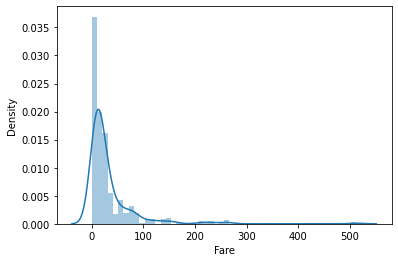

In [65]:
sns.distplot(df["Fare"])

<AxesSubplot: xlabel='Age', ylabel='Density'>

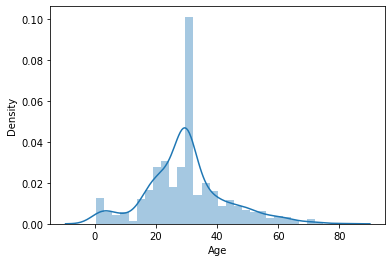

In [66]:
sns.distplot(df["Age"])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

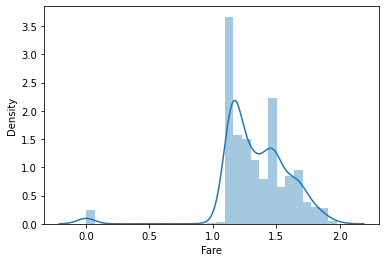

In [68]:

def handle_outliers(col):
    df[col]=np.log1p(df[col])   
handle_outliers('Fare')
sns.distplot(df["Fare"])


<AxesSubplot: xlabel='Age', ylabel='Density'>

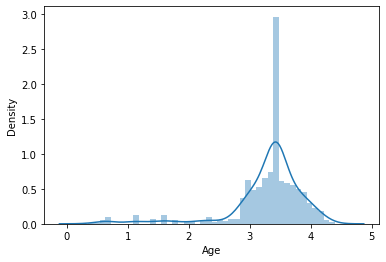

In [69]:
def handle_outliers(col):
    df[col]=np.log1p(df[col])   
handle_outliers('Age')
sns.distplot(df["Age"])

In [70]:
#select importance feature using covariant and univariate analysis

In [71]:
corr=final_df.corr()

In [72]:
corr

,Name,Sex,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
Name,1.000000,0.543351,0.170707,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Sex,0.543351,1.000000,0.096453,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333
Embarked,0.170707,0.096453,1.000000,0.170707,-0.208104,0.030002,-0.064693,-0.025101,0.252207
Survived,1.000000,0.543351,0.170707,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,-0.131900,-0.208104,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.084153,0.030002,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.114631,-0.064693,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.245489,-0.025101,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,0.182333,0.252207,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [73]:
corr['Survived'].sort_values(ascending=False)

Name        1.000000
Survived    1.000000
Sex         0.543351
Fare        0.257307
Embarked    0.170707
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [74]:
corr['Survived'].sort_values(ascending=False).index

Index(['Name', 'Survived', 'Sex', 'Fare', 'Embarked', 'Parch', 'SibSp', 'Age',
       'Pclass'],
      dtype='object')

In [76]:
final_df.drop(columns=['Name','Parch','SibSp'],axis=1,inplace=True)

In [78]:
final_df.shape

(891, 6)

In [77]:
final_df.head()

,Sex,Embarked,Survived,Pclass,Age,Fare
0,0.188908,0.339009,0,3,22.0,7.2500
1,0.742038,0.553571,1,1,38.0,71.2833
2,0.742038,0.339009,1,3,26.0,7.9250
3,0.742038,0.339009,1,1,35.0,53.1000
4,0.188908,0.339009,0,3,35.0,8.0500


In [79]:
final_df.dropna(inplace=True)

In [82]:
X=final_df.drop(columns=['Survived'],axis=1)
y=final_df['Survived']


In [83]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))


  


In [84]:
feature_sel_model

SelectFromModel(estimator=Lasso(alpha=0.005))

In [85]:
feature_sel_model.fit(X,y)
feature_sel_model.get_support()

array([ True, False,  True,  True,  True])

In [87]:
col=X.columns
col

Index(['Sex', 'Embarked', 'Pclass', 'Age', 'Fare'], dtype='object')

In [88]:
select_feature=col[feature_sel_model.get_support()]
select_feature

Index(['Sex', 'Pclass', 'Age', 'Fare'], dtype='object')

In [89]:
X=X[select_feature] 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
y_train.shape

(668,)

In [96]:
model1=LogisticRegression()

In [98]:
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[112  22]
 [ 26  63]]
0.7847533632286996
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [99]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10))

0.7856304619225967

In [100]:
#application of multiple algorithm

In [106]:

models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=100),
    'Xg Boost':XGBClassifier(),
    'KNN':KNeighborsClassifier(n_neighbors=9)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred, average='weighted')
    model_train_precison=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
                                                  
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred, average='weighted')
    model_test_precison=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
                           
    print(list(models.keys())[i])
    
    print('Model Performance for Training set')
    print('-Accuracy:{:.4f}'.format(model_train_accuracy))
    print('-f1_score:{:.4f}'.format(model_train_f1))                        
    print('-precision_score:{:.4f}'.format(model_train_precison))                       
    print('-roc_auc_score:{:.4f}'.format(model_train_rocauc_score)) 
    
    print('---------------------------------------')  
    
    print('Model Performance for Testing set')
    print('-Accuracy:{:.4f}'.format(model_test_accuracy))
    print('-f1_score:{:.4f}'.format(model_test_f1))                       
    print('-precision_score:{:.4f}'.format(model_test_precison))                       
    print('-roc_auc_score:{:.4f}'.format(model_test_rocauc_score))
                           
    print('='*35)
    print('\n')



Logistic Regression
Model Performance for Training set
-Accuracy:0.7994
-f1_score:0.7978
-precision_score:0.7532
-roc_auc_score:0.7799
---------------------------------------
Model Performance for Testing set
-Accuracy:0.7848
-f1_score:0.7839
-precision_score:0.7412
-roc_auc_score:0.7718


Decision Tree
Model Performance for Training set
-Accuracy:0.9805
-f1_score:0.9805
-precision_score:0.9918
-roc_auc_score:0.9759
---------------------------------------
Model Performance for Testing set
-Accuracy:0.7399
-f1_score:0.7382
-precision_score:0.6867
-roc_auc_score:0.7232


Random Forest
Model Performance for Training set
-Accuracy:0.9805
-f1_score:0.9805
-precision_score:0.9878
-roc_auc_score:0.9766
---------------------------------------
Model Performance for Testing set
-Accuracy:0.7937
-f1_score:0.7924
-precision_score:0.7590
-roc_auc_score:0.7793


Xg Boost
Model Performance for Training set
-Accuracy:0.9641
-f1_score:0.9638
-precision_score:0.9831
-roc_auc_score:0.9557
---------------